# Installing Dependencies
Before loading the data, we need to install some dependencies that don’t come by default on Anaconda.

In [ ]:
pip install pyjanitor pyvis --quiet

In [1]:
import pandas as pd
import janitor
import datetime

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

# Load the Data

Load the data and merge it.

In [2]:
# Load all the data
df_1 = pd.read_csv('Connections_Camillo.csv')
df_2 = pd.read_csv('Connections_David.csv')
df_3 = pd.read_csv('Connections_Lida.csv')
df_4 = pd.read_csv('Connections_ian.csv')
df_5 = pd.read_csv('Connections_Sabreena.csv')

In [3]:
# Merge the data
df_ori = pd.concat([df_1, df_2, df_3, df_4, df_5])

In [5]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3123 entries, 0 to 173
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company       3112 non-null   object
 1   Position      3113 non-null   object
 2   Connected On  3123 non-null   object
 3   User          3123 non-null   object
dtypes: object(4)
memory usage: 122.0+ KB


In [9]:
df_ori.head()

,Company,Position,Connected On,User
0,Home365 Property Management,Principal Product Manager,2/14/2023,Camilo
1,Canter,Founder & Principal,2/7/2023,Camilo
2,American Express,Finance Manager,2/7/2023,Camilo
3,Zutto Technologies,Director de nuevos proyectos,2/6/2023,Camilo
4,Amateur Fund,Investor,2/5/2023,Camilo


## Data Cleaning

In [8]:
df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    #.drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', infer_datetime_format=True)
  )
df.head()

,company,position,connected_on,user
0,Home365 Property Management,Principal Product Manager,2023-02-14,Camilo
1,Canter,Founder & Principal,2023-02-07,Camilo
2,American Express,Finance Manager,2023-02-07,Camilo
3,Zutto Technologies,Director de nuevos proyectos,2023-02-06,Camilo
4,Amateur Fund,Investor,2023-02-05,Camilo


## Simple EDA

In [10]:
# Replace the companies with similar names

df['company'] = df['company'].replace('Superintendencia de Banca, Seguros y AFP', 'Superintendencia de Banca, Seguros y AFP del Perú')
df['company'] = df['company'].replace('Superintendencia de Banca, Seguros y Administradoras de Fondos de Pensiones del Perú','Superintendencia de Banca, Seguros y AFP del Perú')
df['company'] = df['company'].replace('SBS','Superintendencia de Banca, Seguros y AFP del Perú')
df['company'] = df['company'].replace('Babson F.W. Olin Graduate School of Business','Babson College')
df['company'] = df['company'].replace('Pontificia Universidad Católica del Perú','Pontificia Universidad Catolica del Peru')
df['company'] = df['company'].replace(["PT. Pegadaian (Persero)", 'PT. Pegadaian'], 'Pegadaian')

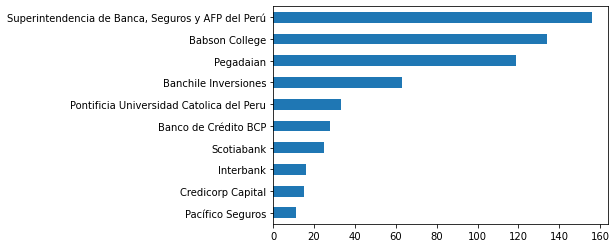

In [16]:
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis()

Text(0, 0.5, 'Company')

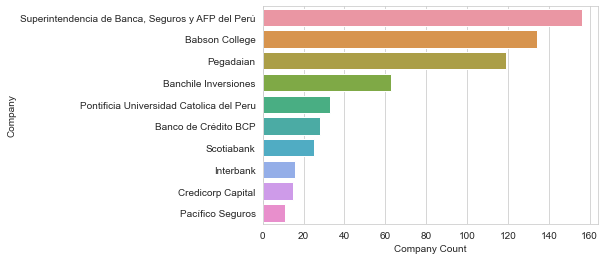

In [44]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

top_companies = df['company'].value_counts().head(10)

sns.barplot(x=top_companies.values, y=top_companies.index, orient='h')

plt.xlabel('Company Count')
plt.ylabel('Company')

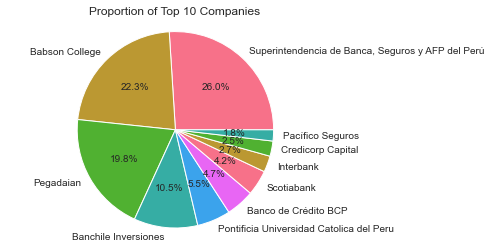

In [20]:
import matplotlib.pyplot as plt

top_companies = df['company'].value_counts().head(10)

plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Top 10 Companies')
plt.show()


Text(0, 0.5, 'Job Position')

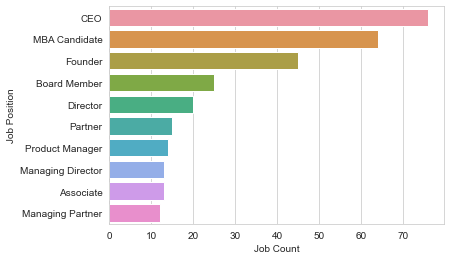

In [43]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

top_position = df['position'].value_counts().head(10)

sns.barplot(x=top_position.values, y=top_position.index, orient='h')

plt.xlabel('Job Count')
plt.ylabel('Job Position')


In [24]:
df['position'] = df['position'].replace('Gerente general','CEO')
df['position'] = df['position'].replace('Gerente General','CEO')
df['position'] = df['position'].replace('Chief Executive Officer','CEO')
df['position'] = df['position'].replace('Co-Founder','Founder')

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("winter_r")

df['connected_on'].hist(xrot=35, bins=15)

plt.title('Distribution of Connected On Dates')
plt.xlabel('Connected On Date')
plt.ylabel('Count')

plt.show()

#ValueError: 'set3' is not a valid value for name; supported values are 'Accent', 'Accent_r', 
#'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 
#'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
#'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
#'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
#'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
#'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
#'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 
#'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', '
#
#cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
#'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
#'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
#'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 
#'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
#'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
#'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 
#'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 
#'winter_r'


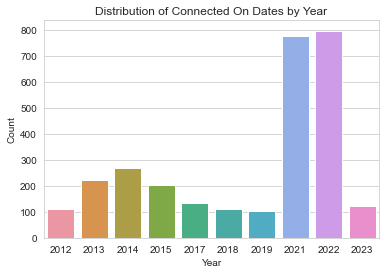

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("husl")

# Extract the year from the 'connected_on' column and group by year
connecton_year = df['connected_on'].dt.year.value_counts().head(10)

sns.barplot(x=connecton_year.index, y=connecton_year.values, orient='v')

plt.title('Distribution of Connected On Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


### Remove freelance and self-employed titles

In [46]:
pattern = "freelance|self-employed|Profesional independiente|Autónomo|Independiente"
df = df[~df['company'].str.contains(pattern, case=False)]

In [47]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 173
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company       3110 non-null   object        
 1   position      3110 non-null   object        
 2   connected_on  3110 non-null   datetime64[ns]
 3   user          3110 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 121.5+ KB


,company,position,connected_on,user
0,Home365 Property Management,Principal Product Manager,2023-02-14,Camilo
1,Canter,Founder & Principal,2023-02-07,Camilo
2,American Express,Finance Manager,2023-02-07,Camilo
3,Zutto Technologies,Director de nuevos proyectos,2023-02-06,Camilo
4,Amateur Fund,Investor,2023-02-05,Camilo


In [48]:
# Groupby

user_group =df.groupby(['user','company'])['company'].count()
user_group = user_group.rename('count')
user_group.head(30)
user_group.info()
df_users=user_group.to_frame()

<class 'pandas.core.series.Series'>
MultiIndex: 2117 entries, ('Camilo', ' 4TC For The Customer') to ('Sabreena', 'wecare.socio')
Series name: count
Non-Null Count  Dtype
--------------  -----
2117 non-null   int64
dtypes: int64(1)
memory usage: 37.9+ KB


In [50]:
df_users.reset_index()

,user,company,count
0,Camilo,4TC For The Customer,1
1,Camilo,IFB Inversiones,1
2,Camilo,.406 Ventures,1
3,Camilo,3L Servicios Financieros,1
4,Camilo,AB InBev Efes,1
...,...,...,...
2112,Sabreena,XIRCLS - Collaborative Marketing Network,1
2113,Sabreena,"ZeroWheel, LLC",1
2114,Sabreena,auxi,1
2115,Sabreena,mobileLIVE Inc,1


In [52]:
#df_users.head(10)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2117 entries, ('Camilo', ' 4TC For The Customer') to ('Sabreena', 'wecare.socio')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   2117 non-null   int64
dtypes: int64(1)
memory usage: 37.9+ KB


## Aggregate sum of connections for companies

In [53]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company','count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(10)


,company,count
0,"Superintendencia de Banca, Seguros y AFP del Perú",156
1,Babson College,134
2,Pegadaian,119
3,Banchile Inversiones,63
4,Pontificia Universidad Catolica del Peru,33
5,Banco de Crédito BCP,28
6,Scotiabank,25
7,Interbank,16
8,Credicorp Capital,15
9,Pacífico Seguros,11


## Aggregate sum of connections for positions

In [54]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,CEO,76
1,MBA Candidate,64
2,Founder,45
3,Board Member,25
4,Director,20
5,Partner,15
6,Product Manager,14
7,Associate,13
8,Managing Director,13
9,Managing Partner,12


In [64]:
df_users = pd.concat([df['user'], df['connected_on']], ignore_index=True).value_counts().reset_index()
df_users.columns = ['user', 'count']
df_users = df_users.sort_values(by="count", ascending=False)
df_position.head(10)

,position,count
0,CEO,76
1,MBA Candidate,64
2,Founder,45
3,Board Member,25
4,Director,20
5,Partner,15
6,Product Manager,14
7,Associate,13
8,Managing Director,13
9,Managing Partner,12


## Creating the network

In [55]:
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

(1918, 2)
(47, 2)


In [56]:
print(df_users.shape)
df_users_reduced=df_users.loc[df_users['count']>=5]
print(df_users_reduced.shape)

(2117, 1)
(34, 1)


In [57]:
print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)

(2326, 2)
(42, 2)


In [63]:
import networkx as nx
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company','count']
df_company = df_company.sort_values(by="count", ascending=False)

df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)

df_users = pd.concat([df['user'], df['connected_on']], ignore_index=True).value_counts().reset_index()
df_users.columns = ['user', 'count']
df_users = df_users.sort_values(by="count", ascending=False)

#creating a network
print(df_company.shape)
df_company_reduced = df_company.loc[df_company['count']>=5]
print(df_company_reduced.shape)

print(df_users.shape)
df_users_reduced=df_users.loc[df_users['count']>=5]
print(df_users_reduced.shape)

print(df_position.shape)
df_position_reduced = df_position.loc[df_position['count']>=5]
print(df_position_reduced.shape)

# initialize graph
g = nx.Graph()

# use iterrows to iterate through the data frame
for _, row in df_users_reduced.iterrows():

  # store user name and count
  user = row['user']
  count = row['count']

  g.add_node(user, size=count*2, color='#9370db')

  # connect user to all the companies they've worked at
  for company in df[df['user'] == user]['company']:
    if company in df_company_reduced['company'].values:
      g.add_edge(user, company, color='grey')

# generate the graph
nt = Network(height='700px', width='700px', bgcolor="white", font_color='black')
nt.from_nx(g)
nt.hrepulsion()
nt.show('user_graph.html')


(1918, 2)
(47, 2)
(1313, 2)
(158, 2)
(2326, 2)
(42, 2)


AssertionError: 